In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles


In [2]:
runname = 'combo_dust_scale0.8_nslice2_v1.6.1_10yrs'
dbFile = 'combo_dust_scale0.8_nslice2_v1.6.1_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
bundleList = []
sql = ''
ra=0.
dec=-20.
metric = metrics.PassMetric(['fiveSigmaDepth', 'filter', 'observationStartMJD', 'night'])
slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
summaryStats = []
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()




Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'filter', 'observationStartMJD', 'fieldRA', 'night', 'fiveSigmaDepth'].
Found 2214837 visits
Running:  ['opsim_Pass_fiveSigmaDepth_filter_observationStartMJD_night_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


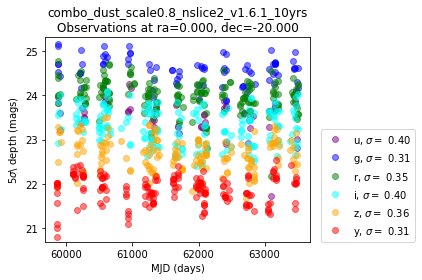

In [3]:
dataSlice = bundleList[0].metricValues[0]

plt.figure()
# let's make a plot
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(dataSlice['filter'] == fn)[0]
    plt.plot(dataSlice['observationStartMJD'][in_filt],
             dataSlice['fiveSigmaDepth'][in_filt], 'o',
            color=f2c[fn], label=fn+r', $\sigma=$ %.2f' % (np.std(dataSlice['fiveSigmaDepth'][in_filt])), alpha=0.5)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$\ depth (mags)')
plt.ylim([20.7,25.3])
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (runname, ra,dec))
plt.tight_layout()

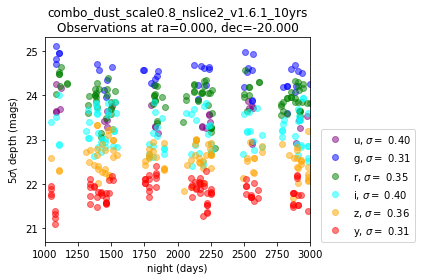

In [4]:

plt.figure()
# let's make a plot
for fn in f2c:
    in_filt = np.where(dataSlice['filter'] == fn)[0]
    plt.plot(dataSlice['night'][in_filt],
             dataSlice['fiveSigmaDepth'][in_filt], 'o',
            color=f2c[fn], label=fn+r', $\sigma=$ %.2f' % (np.std(dataSlice['fiveSigmaDepth'][in_filt])), alpha=0.5)
plt.xlabel('night (days)')
plt.ylabel(r'5$\sigma$\ depth (mags)')
plt.ylim([20.7,25.3])
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (runname, ra,dec))
plt.xlim([1000,3000])
plt.tight_layout()

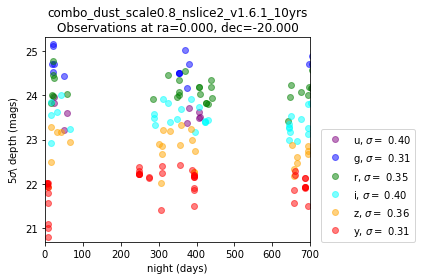

In [5]:
plt.figure()
# let's make a plot
for fn in f2c:
    in_filt = np.where(dataSlice['filter'] == fn)[0]
    plt.plot(dataSlice['night'][in_filt],
             dataSlice['fiveSigmaDepth'][in_filt], 'o',
            color=f2c[fn], label=fn+r', $\sigma=$ %.2f' % (np.std(dataSlice['fiveSigmaDepth'][in_filt])), alpha=0.5)
plt.xlabel('night (days)')
plt.ylabel(r'5$\sigma$\ depth (mags)')
plt.ylim([20.7,25.3])
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (runname, ra,dec))
plt.xlim([0,700])
plt.tight_layout()

6.466666666666667


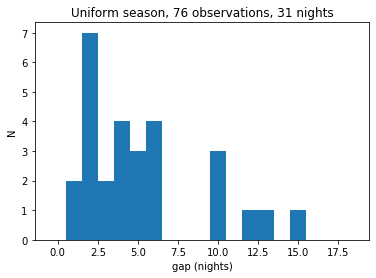

In [6]:
start = np.where((dataSlice['night'] < 500) & (dataSlice['night'] > 200) )[0]
u_night = np.unique(dataSlice['night'][start])
d_night = u_night[1:] -  u_night[0:-1]
bins = np.arange(0,20) -0.5
_temp = plt.hist(d_night, bins=bins)
plt.xlabel('gap (nights)')
plt.ylabel('N')
plt.title('Uniform season, %i observations, %i nights' % (np.size(start), np.size(u_night)) )
print(np.mean(d_night))

4.75


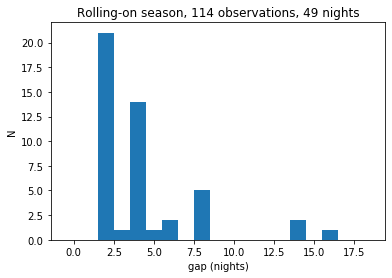

In [7]:
start = np.where((dataSlice['night'] < 1600) & (dataSlice['night'] > 1200))[0]
u_night = np.unique(dataSlice['night'][start])
d_night = u_night[1:] -  u_night[0:-1]
bins = np.arange(0,20) -0.5
_temp = plt.hist(d_night, bins=bins)
plt.xlabel('gap (nights)')
plt.ylabel('N')
plt.title('Rolling-on season, %i observations, %i nights' % (np.size(start), np.size(u_night)) )
print(np.mean(d_night))

9.058823529411764


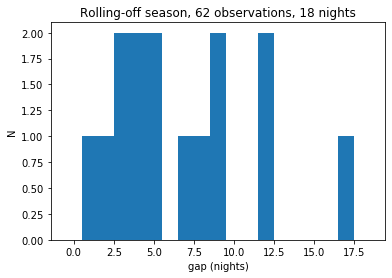

In [8]:
start = np.where((dataSlice['night'] < 2000) & (dataSlice['night'] > 1750))[0]
u_night = np.unique(dataSlice['night'][start])
d_night = u_night[1:] -  u_night[0:-1]
bins = np.arange(0,20) -0.5
_temp = plt.hist(d_night, bins=bins)
plt.xlabel('gap (nights)')
plt.ylabel('N')
plt.title('Rolling-off season, %i observations, %i nights' % (np.size(start), np.size(u_night)) )
print(np.mean(d_night))